In [0]:
!pip install -q tensorflow

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
print(tf.__version__)

1.15.0


In [3]:
!tf_upgrade_v2 -h

usage: tf_upgrade_v2 [-h] [--infile INPUT_FILE] [--outfile OUTPUT_FILE]
                     [--intree INPUT_TREE] [--outtree OUTPUT_TREE]
                     [--copyotherfiles COPY_OTHER_FILES] [--inplace]
                     [--reportfile REPORT_FILENAME] [--mode {DEFAULT,SAFETY}]
                     [--print_all]

Convert a TensorFlow Python file from 1.x to 2.0

Simple usage:
  tf_upgrade_v2.py --infile foo.py --outfile bar.py
  tf_upgrade_v2.py --infile foo.ipynb --outfile bar.ipynb
  tf_upgrade_v2.py --intree ~/code/old --outtree ~/code/new

optional arguments:
  -h, --help            show this help message and exit
  --infile INPUT_FILE   If converting a single file, the name of the file to
                        convert
  --outfile OUTPUT_FILE
                        If converting a single file, the output filename.
  --intree INPUT_TREE   If converting a whole tree of files, the directory to
                        read from (relative or absolute).
  --outtree OUTPUT_TREE


In [0]:
import tensorflow as tf

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [3]:
#import fashion-mnist dataset from keras library
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
type(fashion_mnist)

4423680/4422102 [==============================] - 0s 0us/step


tensorflow.python.util.module_wrapper.TFModuleWrapper

# Data Visualization for Fashion MNIST Dataset


In [0]:
#Allot classname for the output classification
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
#Checkout type and length of train data
X_train = train_images
print('X train', type(X_train), type(X_train[0]), type(X_train[0][0][0]), X_train.shape)
y_train = train_labels
print('y train', type(y_train), type(y_train[0]), y_train.shape)


X train <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.uint8'> (60000, 28, 28)
y train <class 'numpy.ndarray'> <class 'numpy.uint8'> (60000,)


In [6]:
#Checkout type and length of test data
X_test = test_images
print('X test', type(X_test), type(X_test[0]), type(X_test[0][0][0]), X_test.shape)
y_test = test_labels
print('y test', type(y_test), type(y_test[0]), y_test.shape)

X test <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.uint8'> (10000, 28, 28)
y test <class 'numpy.ndarray'> <class 'numpy.uint8'> (10000,)


In [7]:
#Validation set used for tuning the hyperparameters and evaluate the models
X, X_val, y, y_val  = train_test_split(X_train, y_train, test_size = 0.20, random_state = 42)
print(X.shape, X_val.shape)
print(y, y_val)

(48000, 28, 28) (12000, 28, 28)
[7 3 5 ... 6 6 1] [8 8 7 ... 8 8 1]


T-shirt/top


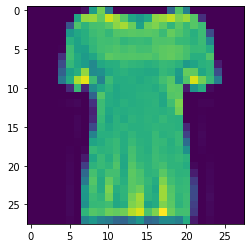

In [10]:
# Image index, you can pick any number between 0 and 59,999
img_index = 10
label_index = y_train[img_index]

# # Show one of the images from the training dataset
plt.imshow(X_train[img_index])
print(class_names[label_index])

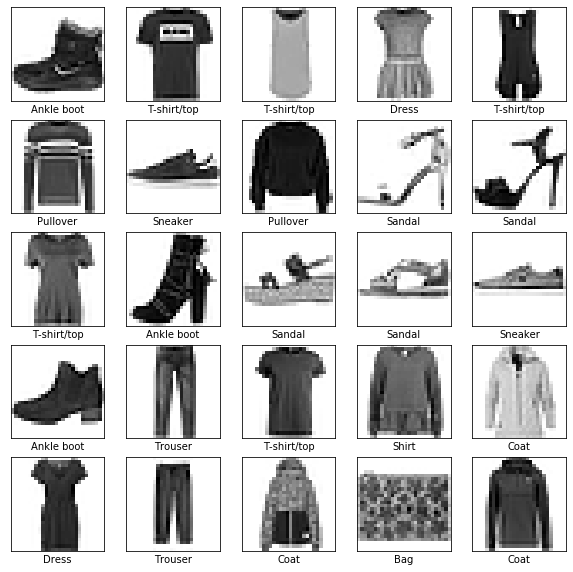

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Hence we see the dataset is already shuffles. Hence we wont be shuffling the dataset again

# Quick examination - performance with unscaled sample

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
  ])
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X, y, epochs=10)

#Evaluate for validation data
test_loss, test_acc = model.evaluate(X_val,  y_val, verbose=2)
print('Train accuracy:', test_acc)

#Evaluate for test data
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('Test accuracy:', test_acc)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 77us/sample - loss: 3.9042 - acc: 0.6710
Epoch 2/10
48000/48000 [==============================] - 3s 67us/sample - loss: 0.7259 - acc: 0.7326
Epoch 3/10
48000/48000 [==============================] - 3s 66us/sample

The training model consists of a sequential model with 1 hidden layer of 128 neurons and 1 output layer with 10 neurons. The activation functions used are ReLU and Softmax. The model trains over 10 epoch cycles, updating weights for inputs to each of the neuron.

Train accuracy is 82.93% and Test accuracy is 82.31%. Similary the loss for training(validation) is less than test. 
This is slightly overfitted model.

Also as the model trains over epoch cycles the training loss has reduced. The model trains over training set of 48000 samples and validates result over 12000 validation samples. The model then updates the weight to reduce the training loss and give higher accuracy in classification of the dataset. 

The test dataset consisting of 10000 samples gives the performance of how the model will work in test situation. Following cells gives analysis for the model performance and testing performance.

In [0]:
###### Get weights from the model
#print(model.get_weights())

In [0]:
###### To save model parameters and loading the model later on
#from keras.models import model_from_json

#json_string = model.to_json()
#print(model.to_json)
#model = model_from_json(json_string)

In [15]:
predictions = model.predict(X_test)
print ('\n\nConfusion Matrix :\n')
print(confusion_matrix(y_test, np.argmax(predictions,axis=1)))
print ('\n\nClassification Matrix :\n')
print(classification_report(y_test, np.argmax(predictions,axis=1), target_names=class_names))



Confusion Matrix :

[[772   2  60  69   0   0  89   0   8   0]
 [  0 944   9  41   2   0   2   0   2   0]
 [ 10   4 854  10  95   0  24   0   3   0]
 [ 18   8  45 883  24   1  18   0   3   0]
 [  0   1 193  42 689   0  74   0   1   0]
 [  0   0   2   0   0 926   2  47   4  19]
 [147   1 243  47  82   0 470   0  10   0]
 [  0   0   0   0   0  20   1 974   0   5]
 [  2   1  35   9   3   4  31   4 911   0]
 [  0   0   0   0   0  25   0 219   1 755]]


Classification Matrix :

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.77      0.79      1000
     Trouser       0.98      0.94      0.96      1000
    Pullover       0.59      0.85      0.70      1000
       Dress       0.80      0.88      0.84      1000
        Coat       0.77      0.69      0.73      1000
      Sandal       0.95      0.93      0.94      1000
       Shirt       0.66      0.47      0.55      1000
     Sneaker       0.78      0.97      0.87      1000
         Bag       0.97      0.91

The class Sandal has highest precision (97%) and the lowest precision is of class Shirt (56%) (understandly there are more False positives with class T-shirt with class Coat, due to similarity in appearences).

Similarly the recall value of all the classes is reasonably high (85%), except for class of Shirt, Dress and Coat. The recall is sensitivity of getting accurate classification.

# Input Data Normalization


In [0]:
# Normalizing pixels value from 0 to 255 into 0 to 1
X = X / 255.0
X_val = X_val/ 255.0
X_test = X_test / 255.0

#The pixels are of type uint8_t. Hence max value of pixel is 255 and min value is 0.


In [17]:
type(X[0][0][0])

numpy.float64

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
  ])
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X, y, epochs=10)

#Evaluate for validation data
test_loss, test_acc = model.evaluate(X_val,  y_val, verbose=2)
print('Train accuracy:', test_acc)

#Evaluate for test data
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('Test accuracy:', test_acc)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 73us/sample - loss: 0.5140 - acc: 0.8213
Epoch 2/10
48000/48000 [==============================] - 3s 72us/sample - loss: 0.3887 - acc: 0.8598
Epoch 3/10
48000/48000 [==============================] - 3s 71us/sample - loss: 0.3479 - acc: 0.8737
Epoch 4/10
48000/48000 [=========================

In [19]:
predictions = model.predict(X_test)
print ('\n\nConfusion Matrix :\n')
print(confusion_matrix(y_test, np.argmax(predictions,axis=1)))
print ('\n\nClassification Matrix :\n')
print(classification_report(y_test, np.argmax(predictions,axis=1), target_names=class_names))



Confusion Matrix :

[[810   1  53  16   5   2 107   0   6   0]
 [  3 973   2  14   4   0   3   0   1   0]
 [  7   0 887   5  59   0  41   0   1   0]
 [ 29  14  33 860  37   0  22   0   5   0]
 [  0   0 161  22 749   0  68   0   0   0]
 [  0   0   0   1   0 949   0  28   0  22]
 [112   0 153  24  50   0 654   0   7   0]
 [  0   0   0   0   0  15   0 974   0  11]
 [  6   0   8   2   5   2   9   5 963   0]
 [  0   0   0   0   0   7   1  59   0 933]]


Classification Matrix :

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.81      0.82      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.68      0.89      0.77      1000
       Dress       0.91      0.86      0.88      1000
        Coat       0.82      0.75      0.78      1000
      Sandal       0.97      0.95      0.96      1000
       Shirt       0.72      0.65      0.69      1000
     Sneaker       0.91      0.97      0.94      1000
         Bag       0.98      0.96

The accuracy is higher with Normalizing the input values.

Also, the precision and recall values for the classes has imporved.

# 
Testing different activation funtion effect on accuracy/loss

In [20]:
X_train = X_train / 255.0
type(X_train[0][0][0])    #checking if normalized

numpy.float64

**Testing  different activation funtion effect on accuracy/loss**



In [0]:
act_fun ={'sigmoid', 'tanh', 'relu', 'softmax'}

relu
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 4s 89us/sample - loss: 2.3268 - acc: 0.0995 - val_loss: 2.3026 - val_acc: 0.1030
Epoch 2/15
48000/48000 [==============================] - 4s 84us/sample - loss: 2.3024 - acc: 0.0993 - val_loss: 2.3026 - val_acc: 0.1030
Epoch 3/15
48000/48000 [==============================] - 4s 78us/sample - loss: 2.3024 - acc: 0.0993 - val_loss: 2.3026 - val_acc: 0.1030
Epoch 4/15
48000/48000 [==============================] - 4s 78us/sample - loss: 2.3024 - acc: 0.0993 - val_loss: 2.3024 - val_acc: 0.1031
Epoch 5/15
48000/48000 [==============================] - 4s 78us/sample - loss: 2.3024 - acc: 0.0993 - val_loss: 2.3024 - val_acc: 0.1031
Epoch 6/15
48000/48000 [==============================] - 4s 82us/sample - loss: 2.3012 - acc: 0.0998 - val_loss: 2.2931 - val_acc: 0.1103
Epoch 7/15
48000/

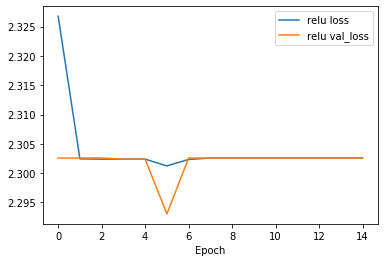

softmax
Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 4s 89us/sample - loss: 0.5236 - acc: 0.8177 - val_loss: 0.4648 - val_acc: 0.8330
Epoch 2/15
48000/48000 [==============================] - 4s 90us/sample - loss: 0.3891 - acc: 0.8586 - val_loss: 0.4266 - val_acc: 0.8469
Epoch 3/15
48000/48000 [==============================] - 4s 83us/sample - loss: 0.3493 - acc: 0.8714 - val_loss: 0.3578 - val_acc: 0.8703
Epoch 4/15
48000/48000 [==============================] - 4s 80us/sample - loss: 0.3220 - acc: 0.8821 - val_loss: 0.3507 - val_acc: 0.8722
Epoch 5/15
48000/48000 [==============================] - 4s 82us/sample - loss: 0.3016 - acc: 0.8897 - val_loss: 0.3370 - val_acc: 0.8815
Epoch 6/15
48000/48000 [==============================] - 4s 80us/sample - loss: 0.2865 - acc: 0.8951 - val_loss: 0.3453 - val_acc: 0.8767
Epoch 7/15
48000/48000 [==============================] - 4s 82us/sample - loss: 0.2729 - acc: 0.8988 - val_

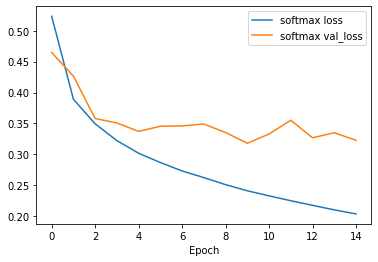

sigmoid
Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 4s 86us/sample - loss: 0.5349 - acc: 0.8164 - val_loss: 0.4303 - val_acc: 0.8432
Epoch 2/15
48000/48000 [==============================] - 4s 80us/sample - loss: 0.3952 - acc: 0.8605 - val_loss: 0.3930 - val_acc: 0.8606
Epoch 3/15
48000/48000 [==============================] - 4s 84us/sample - loss: 0.3542 - acc: 0.8729 - val_loss: 0.3741 - val_acc: 0.8646
Epoch 4/15
48000/48000 [==============================] - 4s 80us/sample - loss: 0.3266 - acc: 0.8812 - val_loss: 0.3541 - val_acc: 0.8708
Epoch 5/15
48000/48000 [==============================] - 4s 77us/sample - loss: 0.3050 - acc: 0.8878 - val_loss: 0.3342 - val_acc: 0.8813
Epoch 6/15
48000/48000 [==============================] - 4s 77us/sample - loss: 0.2903 - acc: 0.8951 - val_loss: 0.3205 - val_acc: 0.8857
Epoch 7/15
48000/48000 [==============================] - 4s 77us/sample - loss: 0.2764 - acc: 0.8975 - val_

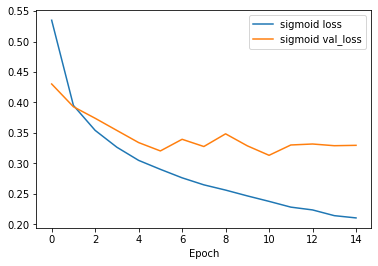

tanh
Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 4s 84us/sample - loss: 2.3790 - acc: 0.2488 - val_loss: 2.2880 - val_acc: 0.2475
Epoch 2/15
48000/48000 [==============================] - 4s 82us/sample - loss: 2.2882 - acc: 0.2530 - val_loss: 2.2880 - val_acc: 0.2474
Epoch 3/15
48000/48000 [==============================] - 4s 86us/sample - loss: 2.2882 - acc: 0.2530 - val_loss: 2.2880 - val_acc: 0.2475
Epoch 4/15
48000/48000 [==============================] - 4s 82us/sample - loss: 2.2882 - acc: 0.2530 - val_loss: 2.2880 - val_acc: 0.2475
Epoch 5/15
48000/48000 [==============================] - 4s 83us/sample - loss: 2.2882 - acc: 0.2529 - val_loss: 2.2880 - val_acc: 0.2474
Epoch 6/15
48000/48000 [==============================] - 4s 81us/sample - loss: 2.2873 - acc: 0.2501 - val_loss: 2.2847 - val_acc: 0.2393
Epoch 7/15
48000/48000 [==============================] - 4s 83us/sample - loss: 2.3016 - acc: 0.1325 - val_los

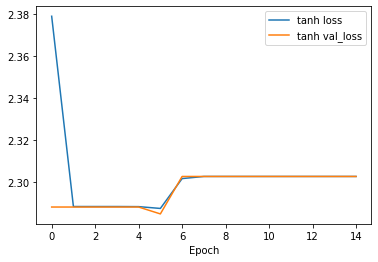

In [22]:
#Changing activation function in output layer

for fun in act_fun:
  print(fun)
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation=fun)
  ])
  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

  history = model.fit(X_train, y_train, validation_split=0.20, epochs=15)
  plt.plot(history.history['loss'], label = fun+' loss')
  plt.plot(history.history['val_loss'], label = fun+' val_loss')

  plt.xlabel('Epoch')
  plt.legend()
  plt.show()


Softmax is more stable function in output layer wrt to loss. The performance at higher epoch layers for different activation function becomes almost similar.

relu
Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 4s 88us/sample - loss: 0.5257 - acc: 0.8169 - val_loss: 0.4170 - val_acc: 0.8512
Epoch 2/15
48000/48000 [==============================] - 4s 84us/sample - loss: 0.3886 - acc: 0.8612 - val_loss: 0.4079 - val_acc: 0.8549
Epoch 3/15
48000/48000 [==============================] - 4s 86us/sample - loss: 0.3482 - acc: 0.8742 - val_loss: 0.3578 - val_acc: 0.8722
Epoch 4/15
48000/48000 [==============================] - 4s 92us/sample - loss: 0.3212 - acc: 0.8824 - val_loss: 0.3509 - val_acc: 0.8773
Epoch 5/15
48000/48000 [==============================] - 4s 91us/sample - loss: 0.3012 - acc: 0.8887 - val_loss: 0.3358 - val_acc: 0.8794
Epoch 6/15
48000/48000 [==============================] - 4s 89us/sample - loss: 0.2859 - acc: 0.8945 - val_loss: 0.3578 - val_acc: 0.8746
Epoch 7/15
48000/48000 [==============================] - 4s 84us/sample - loss: 0.2723 - acc: 0.8995 - val_los

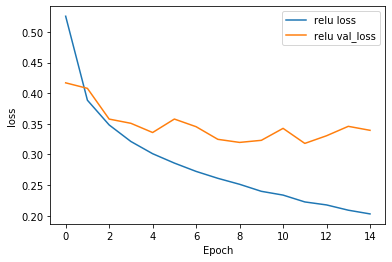

softmax
Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 4s 89us/sample - loss: 1.4644 - acc: 0.6228 - val_loss: 1.0416 - val_acc: 0.6671
Epoch 2/15
48000/48000 [==============================] - 4s 82us/sample - loss: 0.8877 - acc: 0.6711 - val_loss: 0.8017 - val_acc: 0.6787
Epoch 3/15
48000/48000 [==============================] - 4s 82us/sample - loss: 0.7510 - acc: 0.6835 - val_loss: 0.7375 - val_acc: 0.6828
Epoch 4/15
48000/48000 [==============================] - 4s 83us/sample - loss: 0.7010 - acc: 0.6950 - val_loss: 0.7027 - val_acc: 0.7048
Epoch 5/15
48000/48000 [==============================] - 4s 85us/sample - loss: 0.6647 - acc: 0.7181 - val_loss: 0.6613 - val_acc: 0.7297
Epoch 6/15
48000/48000 [==============================] - 4s 83us/sample - loss: 0.6299 - acc: 0.7390 - val_loss: 0.6405 - val_acc: 0.7461
Epoch 7/15
48000/48000 [==============================] - 4s 86us/sample - loss: 0.6078 - acc: 0.7480 - val_

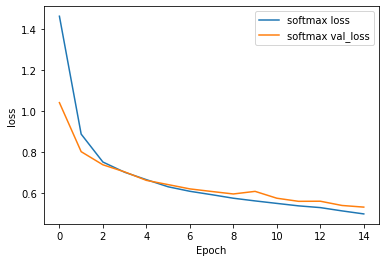

sigmoid
Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 4s 84us/sample - loss: 0.5709 - acc: 0.8074 - val_loss: 0.4458 - val_acc: 0.8392
Epoch 2/15
48000/48000 [==============================] - 4s 85us/sample - loss: 0.4057 - acc: 0.8541 - val_loss: 0.3899 - val_acc: 0.8593
Epoch 3/15
48000/48000 [==============================] - 4s 92us/sample - loss: 0.3669 - acc: 0.8674 - val_loss: 0.3738 - val_acc: 0.8597
Epoch 4/15
48000/48000 [==============================] - 4s 91us/sample - loss: 0.3412 - acc: 0.8754 - val_loss: 0.3422 - val_acc: 0.8751
Epoch 5/15
48000/48000 [==============================] - 4s 85us/sample - loss: 0.3215 - acc: 0.8837 - val_loss: 0.3516 - val_acc: 0.8704
Epoch 6/15
48000/48000 [==============================] - 4s 83us/sample - loss: 0.3059 - acc: 0.8879 - val_loss: 0.3388 - val_acc: 0.8749
Epoch 7/15
48000/48000 [==============================] - 4s 83us/sample - loss: 0.2917 - acc: 0.8933 - val_

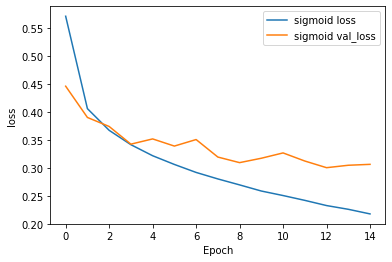

tanh
Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 4s 86us/sample - loss: 0.4902 - acc: 0.8257 - val_loss: 0.4107 - val_acc: 0.8512
Epoch 2/15
48000/48000 [==============================] - 4s 85us/sample - loss: 0.3784 - acc: 0.8620 - val_loss: 0.4038 - val_acc: 0.8482
Epoch 3/15
48000/48000 [==============================] - 4s 82us/sample - loss: 0.3440 - acc: 0.8749 - val_loss: 0.3729 - val_acc: 0.8637
Epoch 4/15
48000/48000 [==============================] - 4s 81us/sample - loss: 0.3192 - acc: 0.8830 - val_loss: 0.3409 - val_acc: 0.8739
Epoch 5/15
48000/48000 [==============================] - 4s 80us/sample - loss: 0.3008 - acc: 0.8889 - val_loss: 0.3313 - val_acc: 0.8785
Epoch 6/15
48000/48000 [==============================] - 4s 82us/sample - loss: 0.2853 - acc: 0.8940 - val_loss: 0.3219 - val_acc: 0.8835
Epoch 7/15
48000/48000 [==============================] - 4s 81us/sample - loss: 0.2705 - acc: 0.8985 - val_los

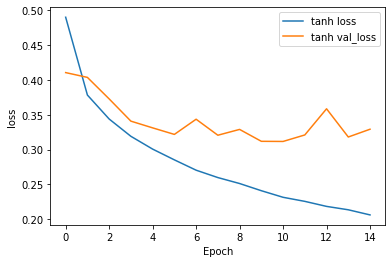

In [23]:
#Changing activation function in hidden layer

for fun in act_fun:
  print(fun)
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=fun),
    keras.layers.Dense(10, activation='softmax')
  ])
  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

  history = model.fit(X_train, y_train, validation_split=0.20, epochs=15)
  plt.plot(history.history['loss'], label = fun+' loss')
  plt.plot(history.history['val_loss'], label = fun+' val_loss')

  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.show()


In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
  ])
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X, y, epochs=10)

#Evaluate for validation data
test_loss, test_acc = model.evaluate(X_val,  y_val, verbose=2)
print('Train accuracy:', test_acc)

#Evaluate for test data
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('Test accuracy:', test_acc)


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 74us/sample - loss: 0.5238 - acc: 0.8147
Epoch 2/10
48000/48000 [==============================] - 3s 70us/sample - loss: 0.3881 - acc: 0.8600
Epoch 3/10
48000/48000 [==============================] - 3s 72us/sample - loss: 0.3437 - acc: 0.8748
Epoch 4/10
48000/48000 [========================

In [25]:
predictions = model.predict(X_test)
print ('\n\nConfusion Matrix :\n')
print(confusion_matrix(y_test, np.argmax(predictions,axis=1)))
print ('\n\nClassification Matrix :\n')
print(classification_report(y_test, np.argmax(predictions,axis=1), target_names=class_names))



Confusion Matrix :

[[832   1   9  19   2   1 134   0   2   0]
 [  4 971   1  17   3   0   3   0   1   0]
 [ 20   1 708  12 155   0 104   0   0   0]
 [ 31   5   5 892  31   0  34   0   2   0]
 [  0   1  63  24 838   0  74   0   0   0]
 [  0   0   0   1   0 979   0  12   0   8]
 [114   0  56  25  65   0 736   0   4   0]
 [  0   0   0   0   0  48   0 937   0  15]
 [ 13   0   3   5   8  13  15   4 939   0]
 [  0   0   0   0   0  19   1  50   0 930]]


Classification Matrix :

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.83      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.84      0.71      0.77      1000
       Dress       0.90      0.89      0.89      1000
        Coat       0.76      0.84      0.80      1000
      Sandal       0.92      0.98      0.95      1000
       Shirt       0.67      0.74      0.70      1000
     Sneaker       0.93      0.94      0.94      1000
         Bag       0.99      0.94

In [26]:
# Observing Accuracy and loss over 50 epoch

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, y_train, validation_split=0.20, epochs=50, batch_size=1000, verbose=1)



Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 1s 23us/sample - loss: 0.9647 - acc: 0.6801 - val_loss: 0.5959 - val_acc: 0.7985
Epoch 2/50
48000/48000 [==============================] - 1s 18us/sample - loss: 0.5444 - acc: 0.8174 - val_loss: 0.4990 - val_acc: 0.8305
Epoch 3/50
48000/48000 [==============================] - 1s 18us/sample - loss: 0.4729 - acc: 0.8395 - val_loss: 0.4714 - val_acc: 0.8372
Epoch 4/50
48000/48000 [==============================] - 1s 18us/sample - loss: 0.4385 - acc: 0.8496 - val_loss: 0.4320 - val_acc: 0.8513
Epoch 5/50
48000/48000 [==============================] - 1s 18us/sample - loss: 0.4116 - acc: 0.8578 - val_loss: 0.4198 - val_acc: 0.8549
Epoch 6/50
48000/48000 [==============================] - 1s 18us/sample - loss: 0.3931 - acc: 0.8639 - val_loss: 0.4038 - val_acc: 0.8602
Epoch 7/50
48000/48000 [==============================] - 1s 19us/sample - loss: 0.3800 - acc: 0.8680 - val_loss: 0.

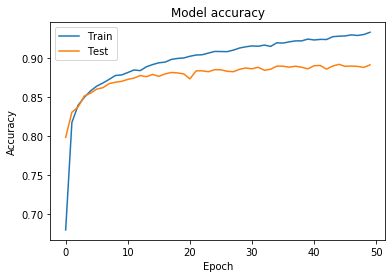

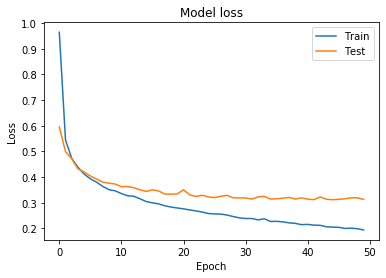

In [27]:

#Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Finding optimum number of neurons for 1 hidden layer Neural Network

In [0]:
x =[]
z =[]

for i in range (1, 201):
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(i, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
  ])
  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy','mse'])
  train = model.fit(train_images, train_labels, validation_split=0.20)

  z.append(train.history['loss']) #loss
  x.append(train.history['val_loss']) #val_loss


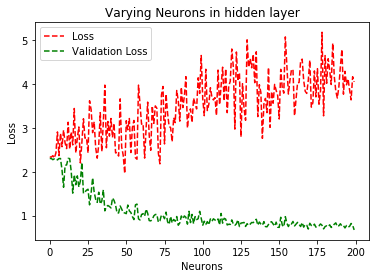

In [29]:
plt.plot( z , 'r--', label ='Loss')
plt.plot( x , 'g--', label ='Validation Loss')
plt.title('Varying Neurons in hidden layer')
plt.ylabel('Loss')
plt.xlabel('Neurons')
plt.legend()
plt.show()

# Training with multiple hidden layer Neural Network


In [10]:
# 6 hidden layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
  ])
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(X, y, epochs=50)

#Evaluate for validation data
test_loss, test_acc = model.evaluate(X_val,  y_val, verbose=2)
print('Train accuracy:', test_acc)

#Evaluate for test data
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('Test accuracy:', test_acc)

predictions = model.predict(X_test)
print ('\n\nConfusion Matrix :\n')
print(confusion_matrix(y_test, np.argmax(predictions,axis=1)))
print ('\n\nClassification Matrix :\n')
print(classification_report(y_test, np.argmax(predictions,axis=1), target_names=class_names))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 40)                31400     
_________________________________________________________________
dense_3 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_4 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_5 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_6 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_7 (Dense)              (None, 40)               

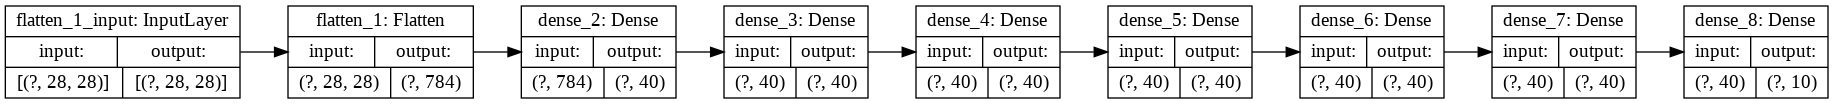

In [11]:
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96)

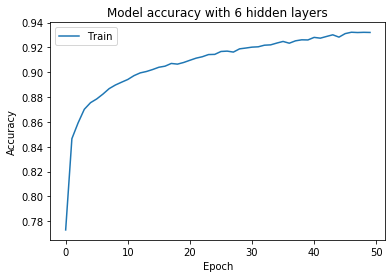

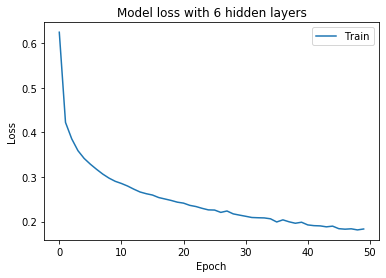

In [12]:
#Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy with 6 hidden layers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss with 6 hidden layers')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [13]:
# 3 hidden layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
  ])
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X, y, epochs=50)

#Evaluate for validation data
test_loss, test_acc = model.evaluate(X_val,  y_val, verbose=2)
print('Train accuracy:', test_acc)

#Evaluate for test data
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('Test accuracy:', test_acc)

predictions = model.predict(X_test)
print ('\n\nConfusion Matrix :\n')
print(confusion_matrix(y_test, np.argmax(predictions,axis=1)))
print ('\n\nClassification Matrix :\n')
print(classification_report(y_test, np.argmax(predictions,axis=1), target_names=class_names))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 40)                31400     
_________________________________________________________________
dense_10 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_11 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                410       
Total params: 35,090
Trainable params: 35,090
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples
Epoch 1/50
48000/48000 [==============================] - 4s 74us/sample - loss: 0.5643 - acc

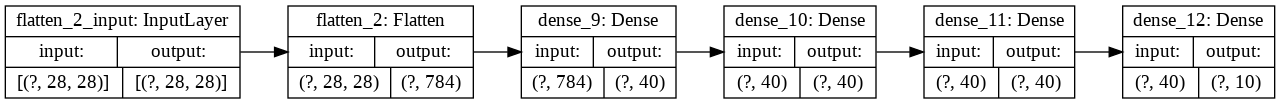

In [14]:
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96)

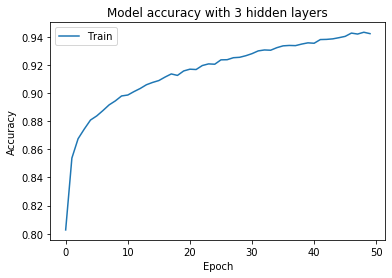

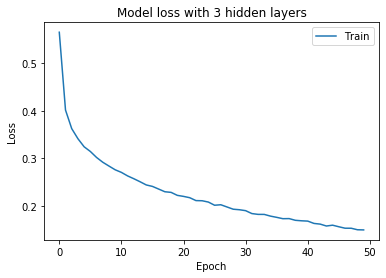

In [15]:
#Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy with 3 hidden layers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss with 3 hidden layers')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [16]:
# 1 hidden layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
  ])
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X, y, epochs=50)

#Evaluate for validation data
test_loss, test_acc = model.evaluate(X_val,  y_val, verbose=2)
print('Train accuracy:', test_acc)

#Evaluate for test data
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('Test accuracy:', test_acc)

predictions = model.predict(X_test)
print ('\n\nConfusion Matrix :\n')
print(confusion_matrix(y_test, np.argmax(predictions,axis=1)))
print ('\n\nClassification Matrix :\n')
print(classification_report(y_test, np.argmax(predictions,axis=1), target_names=class_names))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 40)                31400     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                410       
Total params: 31,810
Trainable params: 31,810
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 71us/sample - loss: 0.5558 - acc: 0.8068
Epoch 2/50
48000/48000 [==============================] - 3s 72us/sample - loss: 0.4182 - acc: 0.8525
Epoch 3/50
48000/48000 [==============================] - 3s 62us/sample - loss: 0.3823 - acc: 0.8643
Epoch 4/50
48000/48000 [===========================

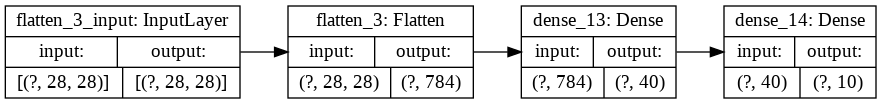

In [17]:
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96)

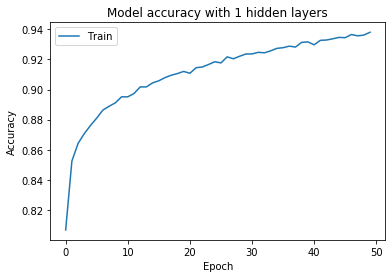

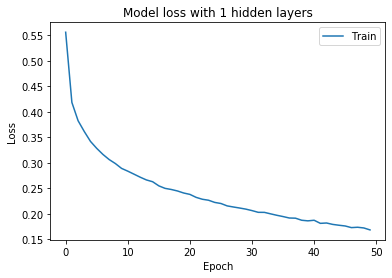

In [18]:
#Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy with 1 hidden layers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss with 1 hidden layers')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Training with different batch sizes

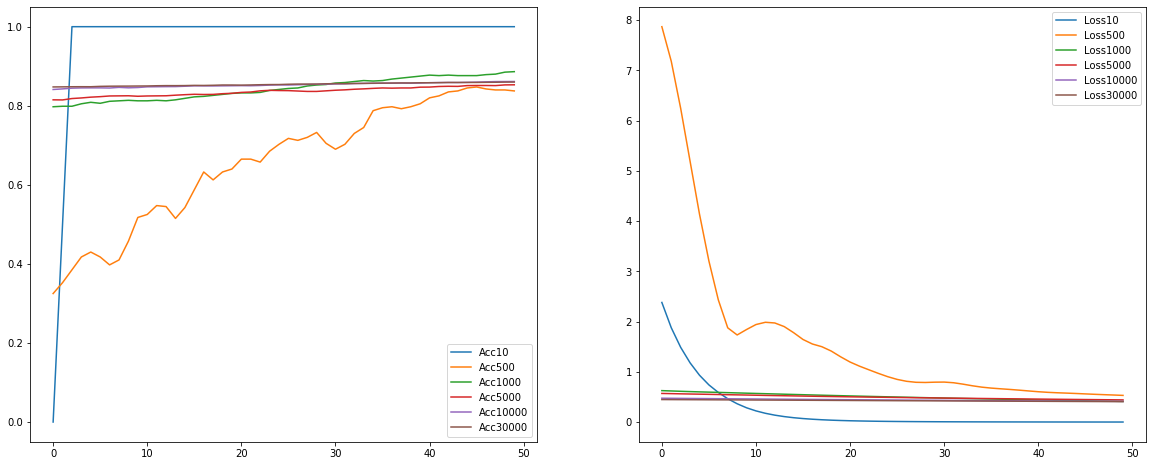

In [19]:
batch =[ 10, 500, 1000, 5000, 10000, 30000]#[1, 10, 100, 500, 600, 1000, 5000, 6000, 10000, 20000, 30000, 40000, 50000, 60000]

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
  ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

for bat in batch:
  history=model.fit(X[:bat,:], y[:bat], epochs=50, batch_size=bat, validation_split=0.20, verbose=0)
  axes[0].plot(history.history['acc'], label='Acc{}'.format(bat))
  axes[1].plot(history.history['loss'], label='Loss{}'.format(bat))
axes[0].legend()
axes[1].legend()
plt.show()



# Prediction Result and Visualization

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
  ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X, y, epochs=50, batch_size=100, validation_split=0.20, verbose=0)

#Evaluate for test data
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('Test accuracy:', test_acc)

predictions = model.predict(X_test)
print ('\n\nConfusion Matrix :\n')
print(confusion_matrix(y_test, np.argmax(predictions,axis=1)))
print ('\n\nClassification Matrix :\n')
print(classification_report(y_test, np.argmax(predictions,axis=1), target_names=class_names))

10000/10000 - 0s - loss: 0.4219 - acc: 0.8725
Test accuracy: 0.8725


Confusion Matrix :

[[837   6  17  33   5   2  95   0   5   0]
 [  6 963   2  21   4   0   4   0   0   0]
 [ 13   1 811  12 114   0  47   0   2   0]
 [ 25  10  16 886  39   2  19   0   3   0]
 [  1   1  91  25 845   2  33   0   2   0]
 [  1   0   0   1   0 964   0  22   3   9]
 [136   1 128  27 100   2 603   0   3   0]
 [  0   0   0   0   0  41   0 944   0  15]
 [  9   0   8   7   9   7  11   2 947   0]
 [  1   0   0   0   0  26   1  47   0 925]]


Classification Matrix :

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.84      0.83      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.76      0.81      0.78      1000
       Dress       0.88      0.89      0.88      1000
        Coat       0.76      0.84      0.80      1000
      Sandal       0.92      0.96      0.94      1000
       Shirt       0.74      0.60      0.67      1000
     Sneaker       

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

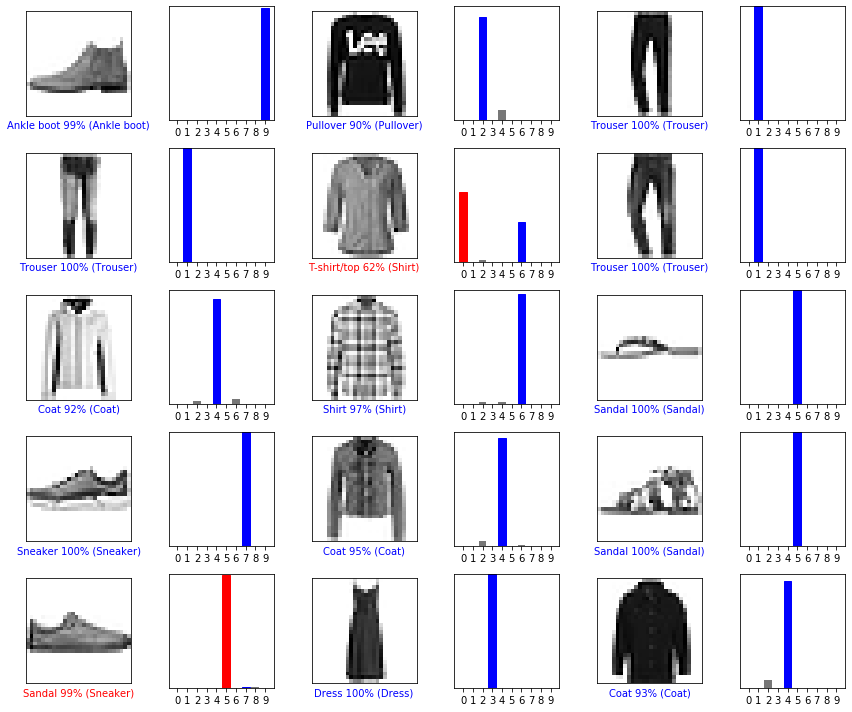

In [22]:
#i = 0
#plt.figure(figsize=(6,3))
#plt.subplot(1,2,1)
#plot_image(i, predictions[i], test_labels, test_images)
#plt.subplot(1,2,2)
#plot_value_array(i, predictions[i],  test_labels)
#plt.show()

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

@article{DBLP:journals/corr/abs-1708-07747,
  author    = {Han Xiao and
               Kashif Rasul and
               Roland Vollgraf},
  title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
               Algorithms},
  journal   = {CoRR},
  volume    = {abs/1708.07747},
  year      = {2017},
  url       = {http://arxiv.org/abs/1708.07747},
  archivePrefix = {arXiv},
  eprint    = {1708.07747},
  timestamp = {Mon, 13 Aug 2018 16:47:27 +0200},
  biburl    = {https://dblp.org/rec/bib/journals/corr/abs-1708-07747},
  bibsource = {dblp computer science bibliography, https://dblp.org}
}